In [1]:
VERSION = 32
CLOUD_SINGLE = True
DATA_SMALL = False
FOCAL_LOSS = 0
WEIGHTED = False

In [2]:
%run ./Code.ipynb

In [3]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

In [4]:
my_datasets3 = [7,9,10] # 10 is the worst
my_datasets5 = [11,12]

In [ ]:
# PLAN
# does weighted ensembling has hope? mb only one of the steps?
# replace Densenet161 with seresnet on probs in metadata calculation
# bring focal in
# ensemble with yuval's
# how to incorporate folds 4 and 5 for 5-folds
# validate that all tta are different for all

# OOF

In [7]:
stg = time.time()
for ds in (my_datasets3 + my_datasets5):
    folds = getNFolds(ds)
    for fold in range(folds):
        #pp = pickle.load(open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'rb'))
        predictions = oof_one(num_iter=24, bs=32, fold=fold, dataset=ds)
        #predictions = np.concatenate([pp,predictions],axis=0)
        pickle.dump(predictions, open(PATH_DISK/'ensemble/oof_d{}_f{}_v{}'.format(ds, fold, VERSION),'wb'))
        print('total time', time.time() - stg)

completed epochs: 3 iters starting now: 24
adding dummy serieses 8
DataSet 7 valid size 6496 fold 0
dataset valid: 6496 loader valid: 203
loading model model.b3.f0.d7.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.786 time per batch: 0.136
Batch 100 device: cuda time passed: 12.651 time per batch: 0.127
Batch 150 device: cuda time passed: 18.522 time per batch: 0.123
Batch 200 device: cuda time passed: 23.949 time per batch: 0.120
ver 32, iter 0, fold 0, val ll: 0.0657, cor: 0.8386, auc: 0.9872
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.902 time per batch: 0.138
Batch 100 device: cuda time passed: 12.791 time per batch: 0.128
Batch 150 device: cuda time passed: 18.683 time per batch: 0.125
Batch 200 device: cuda time passed: 23.965 time per batch: 0.120
ver 32, iter 1, fold 0, val ll: 0.0659, cor: 0.8381, auc: 0.9870
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.819 time per batch: 0.136
Batch 100 device: cuda time passed: 12.821

Batch 50 device: cuda time passed: 6.524 time per batch: 0.130
Batch 100 device: cuda time passed: 12.262 time per batch: 0.123
Batch 150 device: cuda time passed: 17.926 time per batch: 0.120
Batch 200 device: cuda time passed: 23.404 time per batch: 0.117
ver 32, iter 23, fold 0, val ll: 0.0660, cor: 0.8377, auc: 0.9871
total running time 801.5174131393433
total time 803.2300508022308
completed epochs: 3 iters starting now: 24
adding dummy serieses 12
DataSet 7 valid size 6560 fold 1
dataset valid: 6560 loader valid: 205
loading model model.b3.f1.d7.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.056 time per batch: 0.141
Batch 100 device: cuda time passed: 13.034 time per batch: 0.130
Batch 150 device: cuda time passed: 18.946 time per batch: 0.126
Batch 200 device: cuda time passed: 24.517 time per batch: 0.123
ver 32, iter 0, fold 1, val ll: 0.0637, cor: 0.8370, auc: 0.9877
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.870 time per batch: 0.137


Batch 50 device: cuda time passed: 6.760 time per batch: 0.135
Batch 100 device: cuda time passed: 12.529 time per batch: 0.125
Batch 150 device: cuda time passed: 18.391 time per batch: 0.123
Batch 200 device: cuda time passed: 23.904 time per batch: 0.120
ver 32, iter 22, fold 1, val ll: 0.0640, cor: 0.8365, auc: 0.9876
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.850 time per batch: 0.137
Batch 100 device: cuda time passed: 12.889 time per batch: 0.129
Batch 150 device: cuda time passed: 18.649 time per batch: 0.124
Batch 200 device: cuda time passed: 24.042 time per batch: 0.120
ver 32, iter 23, fold 1, val ll: 0.0640, cor: 0.8365, auc: 0.9875
total running time 826.1434826850891
total time 1630.8312439918518
completed epochs: 3 iters starting now: 24
adding dummy serieses 2
DataSet 7 valid size 6496 fold 2
dataset valid: 6496 loader valid: 203
loading model model.b3.f2.d7.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.777 time per batch: 0.136

Batch 50 device: cuda time passed: 6.903 time per batch: 0.138
Batch 100 device: cuda time passed: 12.718 time per batch: 0.127
Batch 150 device: cuda time passed: 18.558 time per batch: 0.124
Batch 200 device: cuda time passed: 23.773 time per batch: 0.119
ver 32, iter 21, fold 2, val ll: 0.0621, cor: 0.8393, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.650 time per batch: 0.133
Batch 100 device: cuda time passed: 12.558 time per batch: 0.126
Batch 150 device: cuda time passed: 18.436 time per batch: 0.123
Batch 200 device: cuda time passed: 23.862 time per batch: 0.119
ver 32, iter 22, fold 2, val ll: 0.0618, cor: 0.8401, auc: 0.9885
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.773 time per batch: 0.135
Batch 100 device: cuda time passed: 12.546 time per batch: 0.125
Batch 150 device: cuda time passed: 18.281 time per batch: 0.122
Batch 200 device: cuda time passed: 23.661 time per batch: 0.118
ver 32, iter 23, fold 2, val ll: 0.0617, c

Batch 50 device: cuda time passed: 6.491 time per batch: 0.130
Batch 100 device: cuda time passed: 12.008 time per batch: 0.120
Batch 150 device: cuda time passed: 17.767 time per batch: 0.118
Batch 200 device: cuda time passed: 23.053 time per batch: 0.115
ver 32, iter 20, fold 0, val ll: 0.0645, cor: 0.8396, auc: 0.9879
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.673 time per batch: 0.133
Batch 100 device: cuda time passed: 12.398 time per batch: 0.124
Batch 150 device: cuda time passed: 17.962 time per batch: 0.120
Batch 200 device: cuda time passed: 23.011 time per batch: 0.115
ver 32, iter 21, fold 0, val ll: 0.0643, cor: 0.8398, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.657 time per batch: 0.133
Batch 100 device: cuda time passed: 12.382 time per batch: 0.124
Batch 150 device: cuda time passed: 17.994 time per batch: 0.120
Batch 200 device: cuda time passed: 23.081 time per batch: 0.115
ver 32, iter 22, fold 0, val ll: 0.0645, c

Batch 50 device: cuda time passed: 6.491 time per batch: 0.130
Batch 100 device: cuda time passed: 12.257 time per batch: 0.123
Batch 150 device: cuda time passed: 17.822 time per batch: 0.119
Batch 200 device: cuda time passed: 23.102 time per batch: 0.116
ver 32, iter 19, fold 1, val ll: 0.0629, cor: 0.8395, auc: 0.9878
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.731 time per batch: 0.135
Batch 100 device: cuda time passed: 12.300 time per batch: 0.123
Batch 150 device: cuda time passed: 17.894 time per batch: 0.119
Batch 200 device: cuda time passed: 23.124 time per batch: 0.116
ver 32, iter 20, fold 1, val ll: 0.0628, cor: 0.8398, auc: 0.9878
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.671 time per batch: 0.133
Batch 100 device: cuda time passed: 12.321 time per batch: 0.123
Batch 150 device: cuda time passed: 17.980 time per batch: 0.120
Batch 200 device: cuda time passed: 23.310 time per batch: 0.117
ver 32, iter 21, fold 1, val ll: 0.0629, c

Batch 50 device: cuda time passed: 6.347 time per batch: 0.127
Batch 100 device: cuda time passed: 12.032 time per batch: 0.120
Batch 150 device: cuda time passed: 17.539 time per batch: 0.117
Batch 200 device: cuda time passed: 22.714 time per batch: 0.114
ver 32, iter 18, fold 2, val ll: 0.0621, cor: 0.8383, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.455 time per batch: 0.129
Batch 100 device: cuda time passed: 12.158 time per batch: 0.122
Batch 150 device: cuda time passed: 17.735 time per batch: 0.118
Batch 200 device: cuda time passed: 22.781 time per batch: 0.114
ver 32, iter 19, fold 2, val ll: 0.0620, cor: 0.8386, auc: 0.9888
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.582 time per batch: 0.132
Batch 100 device: cuda time passed: 12.248 time per batch: 0.122
Batch 150 device: cuda time passed: 17.867 time per batch: 0.119
Batch 200 device: cuda time passed: 22.909 time per batch: 0.115
ver 32, iter 20, fold 2, val ll: 0.0621, c

Batch 50 device: cuda time passed: 6.630 time per batch: 0.133
Batch 100 device: cuda time passed: 12.311 time per batch: 0.123
Batch 150 device: cuda time passed: 17.839 time per batch: 0.119
Batch 200 device: cuda time passed: 22.871 time per batch: 0.114
ver 32, iter 17, fold 0, val ll: 0.0644, cor: 0.8393, auc: 0.9877
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.407 time per batch: 0.128
Batch 100 device: cuda time passed: 12.085 time per batch: 0.121
Batch 150 device: cuda time passed: 17.718 time per batch: 0.118
Batch 200 device: cuda time passed: 22.926 time per batch: 0.115
ver 32, iter 18, fold 0, val ll: 0.0645, cor: 0.8394, auc: 0.9876
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.757 time per batch: 0.135
Batch 100 device: cuda time passed: 12.438 time per batch: 0.124
Batch 150 device: cuda time passed: 18.004 time per batch: 0.120
Batch 200 device: cuda time passed: 23.007 time per batch: 0.115
ver 32, iter 19, fold 0, val ll: 0.0645, c

Batch 50 device: cuda time passed: 6.416 time per batch: 0.128
Batch 100 device: cuda time passed: 11.956 time per batch: 0.120
Batch 150 device: cuda time passed: 17.558 time per batch: 0.117
Batch 200 device: cuda time passed: 23.072 time per batch: 0.115
ver 32, iter 16, fold 1, val ll: 0.0626, cor: 0.8398, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.585 time per batch: 0.132
Batch 100 device: cuda time passed: 12.238 time per batch: 0.122
Batch 150 device: cuda time passed: 17.946 time per batch: 0.120
Batch 200 device: cuda time passed: 23.280 time per batch: 0.116
ver 32, iter 17, fold 1, val ll: 0.0627, cor: 0.8395, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.351 time per batch: 0.127
Batch 100 device: cuda time passed: 12.266 time per batch: 0.123
Batch 150 device: cuda time passed: 17.795 time per batch: 0.119
Batch 200 device: cuda time passed: 23.119 time per batch: 0.116
ver 32, iter 18, fold 1, val ll: 0.0625, c

Batch 50 device: cuda time passed: 6.926 time per batch: 0.139
Batch 100 device: cuda time passed: 12.896 time per batch: 0.129
Batch 150 device: cuda time passed: 18.932 time per batch: 0.126
Batch 200 device: cuda time passed: 24.316 time per batch: 0.122
ver 32, iter 15, fold 2, val ll: 0.0614, cor: 0.8407, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 6.720 time per batch: 0.134
Batch 100 device: cuda time passed: 12.497 time per batch: 0.125
Batch 150 device: cuda time passed: 18.528 time per batch: 0.124
Batch 200 device: cuda time passed: 23.964 time per batch: 0.120
ver 32, iter 16, fold 2, val ll: 0.0612, cor: 0.8410, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 7.013 time per batch: 0.140
Batch 100 device: cuda time passed: 13.099 time per batch: 0.131
Batch 150 device: cuda time passed: 18.975 time per batch: 0.127
Batch 200 device: cuda time passed: 24.284 time per batch: 0.121
ver 32, iter 17, fold 2, val ll: 0.0612, c

Batch 50 device: cuda time passed: 5.195 time per batch: 0.104
Batch 100 device: cuda time passed: 9.648 time per batch: 0.096
ver 32, iter 22, fold 0, val ll: 0.0605, cor: 0.8454, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.266 time per batch: 0.105
Batch 100 device: cuda time passed: 9.747 time per batch: 0.097
ver 32, iter 23, fold 0, val ll: 0.0609, cor: 0.8445, auc: 0.9888
total running time 349.59692430496216
total time 6970.119537591934
completed epochs: 3 iters starting now: 24
adding dummy serieses 9
DataSet 11 valid size 3840 fold 1
dataset valid: 3840 loader valid: 120
loading model model.b3.f1.d11.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.050 time per batch: 0.101
Batch 100 device: cuda time passed: 9.415 time per batch: 0.094
ver 32, iter 0, fold 1, val ll: 0.0609, cor: 0.8450, auc: 0.9895
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.317 time per batch: 0.106
Batch 100 device: cuda time passed: 9.716

ver 32, iter 9, fold 2, val ll: 0.0622, cor: 0.8394, auc: 0.9887
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.093 time per batch: 0.102
Batch 100 device: cuda time passed: 9.660 time per batch: 0.097
ver 32, iter 10, fold 2, val ll: 0.0618, cor: 0.8406, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.034 time per batch: 0.101
Batch 100 device: cuda time passed: 9.568 time per batch: 0.096
ver 32, iter 11, fold 2, val ll: 0.0617, cor: 0.8406, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.123 time per batch: 0.102
Batch 100 device: cuda time passed: 9.571 time per batch: 0.096
ver 32, iter 12, fold 2, val ll: 0.0618, cor: 0.8404, auc: 0.9889
setFeats, augmentation -1
Batch 50 device: cuda time passed: 4.958 time per batch: 0.099
Batch 100 device: cuda time passed: 9.482 time per batch: 0.095
ver 32, iter 13, fold 2, val ll: 0.0617, cor: 0.8405, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed

Batch 50 device: cuda time passed: 5.326 time per batch: 0.107
Batch 100 device: cuda time passed: 9.861 time per batch: 0.099
ver 32, iter 22, fold 3, val ll: 0.0637, cor: 0.8396, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.242 time per batch: 0.105
Batch 100 device: cuda time passed: 9.809 time per batch: 0.098
ver 32, iter 23, fold 3, val ll: 0.0638, cor: 0.8398, auc: 0.9883
total running time 347.2085165977478
total time 8000.8881249427795
completed epochs: 3 iters starting now: 24
adding dummy serieses 27
DataSet 11 valid size 3968 fold 4
dataset valid: 3968 loader valid: 124
loading model model.b3.f4.d11.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.273 time per batch: 0.105
Batch 100 device: cuda time passed: 9.776 time per batch: 0.098
ver 32, iter 0, fold 4, val ll: 0.0626, cor: 0.8419, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.208 time per batch: 0.104
Batch 100 device: cuda time passed: 9.69

ver 32, iter 9, fold 0, val ll: 0.0607, cor: 0.8446, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.252 time per batch: 0.105
Batch 100 device: cuda time passed: 9.590 time per batch: 0.096
ver 32, iter 10, fold 0, val ll: 0.0605, cor: 0.8450, auc: 0.9891
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.195 time per batch: 0.104
Batch 100 device: cuda time passed: 9.655 time per batch: 0.097
ver 32, iter 11, fold 0, val ll: 0.0606, cor: 0.8447, auc: 0.9890
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.148 time per batch: 0.103
Batch 100 device: cuda time passed: 9.529 time per batch: 0.095
ver 32, iter 12, fold 0, val ll: 0.0603, cor: 0.8453, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.188 time per batch: 0.104
Batch 100 device: cuda time passed: 9.600 time per batch: 0.096
ver 32, iter 13, fold 0, val ll: 0.0604, cor: 0.8449, auc: 0.9892
setFeats, augmentation -1
Batch 50 device: cuda time passed

Batch 50 device: cuda time passed: 5.022 time per batch: 0.100
Batch 100 device: cuda time passed: 9.738 time per batch: 0.097
ver 32, iter 22, fold 1, val ll: 0.0607, cor: 0.8445, auc: 0.9896
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.017 time per batch: 0.100
Batch 100 device: cuda time passed: 9.448 time per batch: 0.094
ver 32, iter 23, fold 1, val ll: 0.0609, cor: 0.8439, auc: 0.9896
total running time 329.69920206069946
total time 9022.241241931915
completed epochs: 3 iters starting now: 24
adding dummy serieses 21
DataSet 12 valid size 3968 fold 2
dataset valid: 3968 loader valid: 124
loading model model.b3.f2.d12.v32
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.181 time per batch: 0.104
Batch 100 device: cuda time passed: 9.675 time per batch: 0.097
ver 32, iter 0, fold 2, val ll: 0.0621, cor: 0.8398, auc: 0.9886
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.322 time per batch: 0.106
Batch 100 device: cuda time passed: 9.86

ver 32, iter 9, fold 3, val ll: 0.0638, cor: 0.8382, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.109 time per batch: 0.102
Batch 100 device: cuda time passed: 9.691 time per batch: 0.097
ver 32, iter 10, fold 3, val ll: 0.0637, cor: 0.8382, auc: 0.9882
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.375 time per batch: 0.108
Batch 100 device: cuda time passed: 9.962 time per batch: 0.100
ver 32, iter 11, fold 3, val ll: 0.0639, cor: 0.8379, auc: 0.9880
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.126 time per batch: 0.103
Batch 100 device: cuda time passed: 9.708 time per batch: 0.097
ver 32, iter 12, fold 3, val ll: 0.0638, cor: 0.8383, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.142 time per batch: 0.103
Batch 100 device: cuda time passed: 9.697 time per batch: 0.097
ver 32, iter 13, fold 3, val ll: 0.0637, cor: 0.8385, auc: 0.9881
setFeats, augmentation -1
Batch 50 device: cuda time passed

Batch 50 device: cuda time passed: 5.217 time per batch: 0.104
Batch 100 device: cuda time passed: 9.835 time per batch: 0.098
ver 32, iter 22, fold 4, val ll: 0.0614, cor: 0.8437, auc: 0.9884
setFeats, augmentation -1
Batch 50 device: cuda time passed: 5.264 time per batch: 0.105
Batch 100 device: cuda time passed: 9.768 time per batch: 0.098
ver 32, iter 23, fold 4, val ll: 0.0614, cor: 0.8442, auc: 0.9883
total running time 351.90387868881226
total time 10073.441452503204


In [ ]:
#range(6,13) x8
#5113.189187049866

In [12]:
#total running time 1201.68962931633
#total time 15020.348212480545

4.231111111111111

In [5]:
preds_all = getPredsOOF(aug=32,datasets=my_datasets3,datasets5=my_datasets5,ver=32)

In [6]:
preds_all.mean((0,1,2))

array([0.15058669, 0.00445975, 0.05036956, 0.03600293, 0.04913431,
       0.06661819])

In [7]:
names_y = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl'
]

In [8]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_OOF_pred_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_OOF_pred_split_{}.pkl',
]

In [15]:
preds_y = getYuvalOOF(train_md=train_md, names=names_y, names5=names_y5)

adding yuval_idx
adding yuval_idx


In [18]:
preds_y.mean((0,1))

array([0.14303509, 0.00386332, 0.04755156, 0.03477805, 0.04727167,
       0.06297307])

In [19]:
preds_all = np.concatenate([preds_all.mean(1), preds_y], axis=0)

In [20]:
del preds_y

In [21]:
preds_all.shape

(12, 674252, 6)

## OOF analysis

In [22]:
np.set_printoptions(precision=3)

loss = (- train_md[all_ich].values * np.log(preds_all) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all)).mean(1)
for k in range(6):
    print('{:20s} {}'.format(all_ich[k],loss[:,k]))

any                  [0.101 0.099 0.099 0.098 0.097 0.1   0.1   0.099 0.098 0.097 0.096 0.096]
epidural             [0.018 0.016 0.017 0.016 0.016 0.017 0.017 0.015 0.015 0.015 0.015 0.015]
intraparenchymal     [0.043 0.043 0.043 0.042 0.042 0.042 0.042 0.042 0.042 0.041 0.041 0.041]
intraventricular     [0.026 0.026 0.026 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.024 0.025]
subarachnoid         [0.067 0.067 0.066 0.066 0.065 0.066 0.066 0.065 0.065 0.064 0.064 0.064]
subdural             [0.084 0.081 0.082 0.08  0.08  0.082 0.081 0.08  0.08  0.079 0.079 0.079]


In [23]:
print(preds_all.mean(1).transpose())

[[0.151 0.15  0.15  0.151 0.151 0.142 0.143 0.14  0.144 0.145 0.144 0.143]
 [0.003 0.004 0.005 0.005 0.005 0.003 0.004 0.004 0.004 0.004 0.004 0.004]
 [0.05  0.051 0.05  0.05  0.05  0.048 0.048 0.046 0.047 0.047 0.048 0.048]
 [0.036 0.037 0.036 0.035 0.036 0.035 0.035 0.034 0.035 0.034 0.035 0.035]
 [0.05  0.049 0.05  0.048 0.049 0.047 0.047 0.046 0.048 0.048 0.047 0.047]
 [0.068 0.065 0.067 0.067 0.067 0.064 0.062 0.062 0.063 0.064 0.063 0.063]]


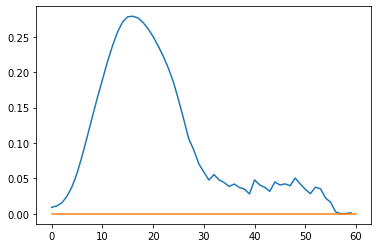

In [24]:
zz = preds_all.mean(0)[:,0]

train_md['prob'] = zz

plt.plot(train_md[['prob','pos_idx']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [25]:
log_loss(train_md['any'],train_md['prob'])

0.09372009210284196

(0, 5)

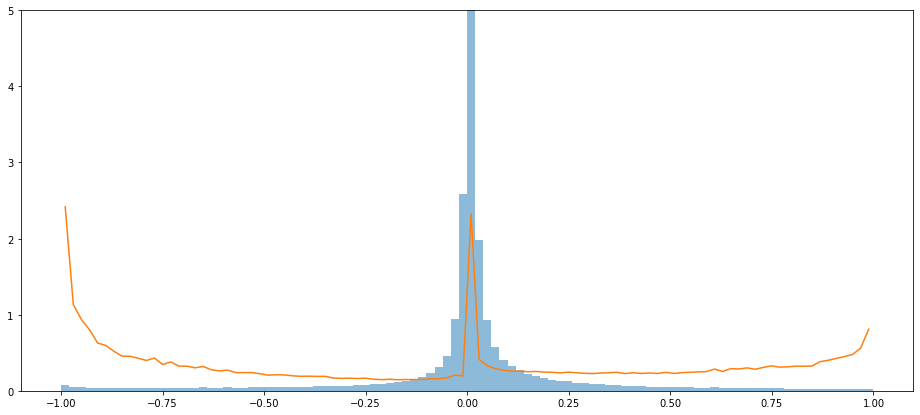

In [22]:
#zz = preds_all.mean(1)[0,:,0]
k=0
zz = preds_all.mean(0)[:,k]
#zz = preds_all[0,0,:,k]
#zz = scalePreds(zz,power=1.3)


plt.figure(figsize=(16, 7))
a = plt.hist(zz - train_md[all_ich[k]],bins=100,alpha=0.5,density=True)
b = 0.5*(a[1][1:] + a[1][:-1])
plt.plot(b,-7*np.log(1-abs(b))*a[0])
plt.ylim([0,5])

In [26]:
np.set_printoptions(precision=2)
zz = preds_all.mean(0)
for k in range(6):
    print(k,np.quantile(zz[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [6.23e-05 8.62e-05 1.27e-04 2.24e-03 9.96e-01 9.99e-01 9.99e-01]
1 [9.16e-06 1.47e-05 2.18e-05 1.47e-04 7.89e-02 4.97e-01 8.94e-01]
2 [2.61e-05 3.46e-05 4.81e-05 3.76e-04 9.84e-01 9.95e-01 9.97e-01]
3 [7.83e-06 1.17e-05 1.88e-05 1.27e-04 9.78e-01 9.93e-01 9.95e-01]
4 [3.39e-05 4.77e-05 6.74e-05 5.72e-04 9.55e-01 9.91e-01 9.95e-01]
5 [3.28e-05 5.15e-05 7.96e-05 1.15e-03 9.66e-01 9.91e-01 9.95e-01]


## Bounding

In [27]:
preds_all.shape

(12, 674252, 6)

In [28]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.057761020555583784


In [29]:
preds_all = predBounding(preds_all, target=train_md[all_ich].values)

initial score 0.057761020555583784
any too low inconsistencies
1 class: 0.0033987045397467614
2 class: 0.02650591569126479
3 class: 0.013060893157652232
4 class: 0.03135029632837574
5 class: 0.08930649569201624
total 0.14383902457834757
any too low corrected score 0.05776269972982542
any too high inconsistencies
total 0.27504355443760886
any too high corrected score 0.057741829717160076


In [30]:
loss = ((- train_md[all_ich].values * np.log(preds_all.mean(0)) \
        - (1 - train_md[all_ich].values) * np.log(1 - preds_all.mean(0)))*class_weights).mean()
print(loss)

0.057741829717160076


## Models behavior per groups

In [31]:
np.set_printoptions(precision=4)
for col in ['PxlMin_zero']:
    for i in train_md[col].unique():
        res = ((- train_md[all_ich].values * np.log(preds_all) - (1 - train_md[all_ich].values) \
                * np.log(1 - preds_all)) * class_weights)[:,(train_md[col] == i)].mean((1,2))
        sz = (train_md[col] == i).sum()
        sz_test = (test_md[col] == i).sum()
        print('{:2d}: {:6d} {:6d} {}'.format(i,sz,sz_test,res))

 0: 447063   5033 [0.0759 0.0747 0.0746 0.0735 0.0734 0.0741 0.0742 0.0731 0.073  0.072
 0.0717 0.0717]
 1: 227189  73512 [0.0369 0.0361 0.0364 0.0354 0.035  0.0371 0.037  0.0361 0.0362 0.0354
 0.035  0.035 ]


# Inference

In [34]:
stg = time.time()

for ds in (my_datasets3 + my_datasets5):
    folds = getNFolds(ds)
    preds = []
    for fold in range(folds):
        preds2 = []
        for anum in range(32):
            predictions = inference_one(fold = fold, anum = anum, bs=bs, dataset=ds)
            preds2.append(predictions)
        preds.append(np.stack(preds2))
    preds = np.stack(preds)
    print('total time', time.time() - stg)
    
    pickle.dump(preds, open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'wb'))

completed epochs: 3
loading model model.b3.f0.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.848 time per batch: 0.185
B20 -> time passed: 2.185 time per batch: 0.109
B30 -> time passed: 2.762 time per batch: 0.092
B40 -> time passed: 3.323 time per batch: 0.083
B50 -> time passed: 4.216 time per batch: 0.084
B60 -> time passed: 4.840 time per batch: 0.081
B70 -> time passed: 5.218 time per batch: 0.075
test processing time: 31.590972900390625
completed epochs: 3
loading model model.b3.f0.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.094 time per batch: 0.109
B20 -> time passed: 1.764 time per batch: 0.088
B30 -> time passed: 2.340 time per batch: 0.078
B40 -> time passed: 2.925 time per batch: 0.073
B50 -> time passed: 3.677 time per batch: 0.074
B60 -> time passed: 4.481 time per batch:

B10 -> time passed: 1.123 time per batch: 0.112
B20 -> time passed: 1.692 time per batch: 0.085
B30 -> time passed: 2.280 time per batch: 0.076
B40 -> time passed: 2.875 time per batch: 0.072
B50 -> time passed: 3.850 time per batch: 0.077
B60 -> time passed: 4.413 time per batch: 0.074
B70 -> time passed: 4.795 time per batch: 0.068
test processing time: 11.55525255203247
completed epochs: 3
loading model model.b3.f0.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.146 time per batch: 0.115
B20 -> time passed: 1.781 time per batch: 0.089
B30 -> time passed: 2.355 time per batch: 0.078
B40 -> time passed: 2.974 time per batch: 0.074
B50 -> time passed: 4.034 time per batch: 0.081
B60 -> time passed: 4.604 time per batch: 0.077
B70 -> time passed: 4.961 time per batch: 0.071
test processing time: 11.764370679855347
completed epochs: 3
loading model model.b3.f0.d7.v32
adding dummy serieses 2

B10 -> time passed: 1.134 time per batch: 0.113
B20 -> time passed: 1.700 time per batch: 0.085
B30 -> time passed: 2.285 time per batch: 0.076
B40 -> time passed: 2.891 time per batch: 0.072
B50 -> time passed: 3.942 time per batch: 0.079
B60 -> time passed: 4.452 time per batch: 0.074
B70 -> time passed: 4.787 time per batch: 0.068
test processing time: 11.720643997192383
completed epochs: 3
loading model model.b3.f0.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.112 time per batch: 0.111
B20 -> time passed: 1.670 time per batch: 0.083
B30 -> time passed: 2.256 time per batch: 0.075
B40 -> time passed: 2.842 time per batch: 0.071
B50 -> time passed: 3.891 time per batch: 0.078
B60 -> time passed: 4.465 time per batch: 0.074
B70 -> time passed: 4.813 time per batch: 0.069
test processing time: 11.74846601486206
completed epochs: 3
loading model model.b3.f1.d7.v32
adding dummy serieses 2

B10 -> time passed: 1.126 time per batch: 0.113
B20 -> time passed: 1.731 time per batch: 0.087
B30 -> time passed: 2.311 time per batch: 0.077
B40 -> time passed: 2.879 time per batch: 0.072
B50 -> time passed: 3.877 time per batch: 0.078
B60 -> time passed: 4.466 time per batch: 0.074
B70 -> time passed: 4.832 time per batch: 0.069
test processing time: 11.381170749664307
completed epochs: 3
loading model model.b3.f1.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.123 time per batch: 0.112
B20 -> time passed: 1.704 time per batch: 0.085
B30 -> time passed: 2.272 time per batch: 0.076
B40 -> time passed: 2.835 time per batch: 0.071
B50 -> time passed: 3.739 time per batch: 0.075
B60 -> time passed: 4.365 time per batch: 0.073
B70 -> time passed: 4.787 time per batch: 0.068
test processing time: 11.35153317451477
completed epochs: 3
loading model model.b3.f1.d7.v32
adding dummy serieses 2

B10 -> time passed: 1.123 time per batch: 0.112
B20 -> time passed: 1.703 time per batch: 0.085
B30 -> time passed: 2.298 time per batch: 0.077
B40 -> time passed: 2.912 time per batch: 0.073
B50 -> time passed: 3.910 time per batch: 0.078
B60 -> time passed: 4.529 time per batch: 0.075
B70 -> time passed: 4.869 time per batch: 0.070
test processing time: 11.507309198379517
completed epochs: 3
loading model model.b3.f1.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.125 time per batch: 0.112
B20 -> time passed: 1.721 time per batch: 0.086
B30 -> time passed: 2.337 time per batch: 0.078
B40 -> time passed: 2.897 time per batch: 0.072
B50 -> time passed: 3.855 time per batch: 0.077
B60 -> time passed: 4.487 time per batch: 0.075
B70 -> time passed: 4.837 time per batch: 0.069
test processing time: 11.426876544952393
completed epochs: 3
loading model model.b3.f1.d7.v32
adding dummy serieses 

B10 -> time passed: 1.163 time per batch: 0.116
B20 -> time passed: 1.728 time per batch: 0.086
B30 -> time passed: 2.324 time per batch: 0.077
B40 -> time passed: 2.940 time per batch: 0.074
B50 -> time passed: 3.966 time per batch: 0.079
B60 -> time passed: 4.526 time per batch: 0.075
B70 -> time passed: 4.879 time per batch: 0.070
test processing time: 11.553879737854004
completed epochs: 3
loading model model.b3.f2.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.100 time per batch: 0.110
B20 -> time passed: 1.677 time per batch: 0.084
B30 -> time passed: 2.241 time per batch: 0.075
B40 -> time passed: 2.875 time per batch: 0.072
B50 -> time passed: 3.807 time per batch: 0.076
B60 -> time passed: 4.429 time per batch: 0.074
B70 -> time passed: 4.839 time per batch: 0.069
test processing time: 11.532918453216553
completed epochs: 3
loading model model.b3.f2.d7.v32
adding dummy serieses 

B10 -> time passed: 1.196 time per batch: 0.120
B20 -> time passed: 1.817 time per batch: 0.091
B30 -> time passed: 2.405 time per batch: 0.080
B40 -> time passed: 3.044 time per batch: 0.076
B50 -> time passed: 3.970 time per batch: 0.079
B60 -> time passed: 4.655 time per batch: 0.078
B70 -> time passed: 5.018 time per batch: 0.072
test processing time: 11.681611776351929
completed epochs: 3
loading model model.b3.f2.d7.v32
adding dummy serieses 26
DataSet 7 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.124 time per batch: 0.112
B20 -> time passed: 1.786 time per batch: 0.089
B30 -> time passed: 2.405 time per batch: 0.080
B40 -> time passed: 3.017 time per batch: 0.075
B50 -> time passed: 3.859 time per batch: 0.077
B60 -> time passed: 4.560 time per batch: 0.076
B70 -> time passed: 4.948 time per batch: 0.071
test processing time: 11.58063554763794
completed epochs: 3
loading model model.b3.f2.d7.v32
adding dummy serieses 2

B10 -> time passed: 1.096 time per batch: 0.110
B20 -> time passed: 1.688 time per batch: 0.084
B30 -> time passed: 2.339 time per batch: 0.078
B40 -> time passed: 2.918 time per batch: 0.073
B50 -> time passed: 3.796 time per batch: 0.076
B60 -> time passed: 4.409 time per batch: 0.073
B70 -> time passed: 4.818 time per batch: 0.069
test processing time: 8.396120071411133
completed epochs: 3
loading model model.b3.f0.d9.v32
adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.157 time per batch: 0.116
B20 -> time passed: 1.714 time per batch: 0.086
B30 -> time passed: 2.276 time per batch: 0.076
B40 -> time passed: 2.886 time per batch: 0.072
B50 -> time passed: 3.909 time per batch: 0.078
B60 -> time passed: 4.436 time per batch: 0.074
B70 -> time passed: 4.780 time per batch: 0.068
test processing time: 8.349351167678833
completed epochs: 3
loading model model.b3.f0.d9.v32
adding dummy serieses 26

B10 -> time passed: 1.079 time per batch: 0.108
B20 -> time passed: 1.680 time per batch: 0.084
B30 -> time passed: 2.222 time per batch: 0.074
B40 -> time passed: 2.801 time per batch: 0.070
B50 -> time passed: 3.757 time per batch: 0.075
B60 -> time passed: 4.394 time per batch: 0.073
B70 -> time passed: 4.772 time per batch: 0.068
test processing time: 8.350691795349121
completed epochs: 3
loading model model.b3.f0.d9.v32
adding dummy serieses 26
DataSet 9 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.201 time per batch: 0.120
B20 -> time passed: 1.800 time per batch: 0.090
B30 -> time passed: 2.407 time per batch: 0.080
B40 -> time passed: 2.999 time per batch: 0.075
B50 -> time passed: 4.035 time per batch: 0.081
B60 -> time passed: 4.515 time per batch: 0.075
B70 -> time passed: 4.866 time per batch: 0.070
test processing time: 8.371662139892578
completed epochs: 3
loading model model.b3.f0.d9.v32
adding dummy serieses 26

B10 -> time passed: 1.161 time per batch: 0.116
B20 -> time passed: 1.761 time per batch: 0.088
B30 -> time passed: 2.357 time per batch: 0.079
B40 -> time passed: 2.982 time per batch: 0.075
B50 -> time passed: 4.023 time per batch: 0.080
B60 -> time passed: 4.630 time per batch: 0.077
B70 -> time passed: 4.952 time per batch: 0.071
test processing time: 8.54989218711853
completed epochs: 3
loading model model.b3.f1.d9.v32
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.170 time per batch: 0.117
B20 -> time passed: 1.790 time per batch: 0.090
B30 -> time passed: 2.400 time per batch: 0.080
B40 -> time passed: 3.034 time per batch: 0.076
B50 -> time passed: 4.097 time per batch: 0.082
B60 -> time passed: 4.618 time per batch: 0.077
B70 -> time passed: 4.944 time per batch: 0.071
test processing time: 8.526099443435669
completed epochs: 3
loading model model.b3.f1.d9.v32
adding dummy serieses 26


B10 -> time passed: 1.083 time per batch: 0.108
B20 -> time passed: 1.657 time per batch: 0.083
B30 -> time passed: 2.239 time per batch: 0.075
B40 -> time passed: 2.830 time per batch: 0.071
B50 -> time passed: 3.827 time per batch: 0.077
B60 -> time passed: 4.397 time per batch: 0.073
B70 -> time passed: 4.787 time per batch: 0.068
test processing time: 8.396154880523682
completed epochs: 3
loading model model.b3.f1.d9.v32
adding dummy serieses 26
DataSet 9 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.104 time per batch: 0.110
B20 -> time passed: 1.710 time per batch: 0.085
B30 -> time passed: 2.303 time per batch: 0.077
B40 -> time passed: 2.857 time per batch: 0.071
B50 -> time passed: 3.871 time per batch: 0.077
B60 -> time passed: 4.389 time per batch: 0.073
B70 -> time passed: 4.745 time per batch: 0.068
test processing time: 8.296058177947998
completed epochs: 3
loading model model.b3.f1.d9.v32
adding dummy serieses 26

B10 -> time passed: 1.192 time per batch: 0.119
B20 -> time passed: 1.798 time per batch: 0.090
B30 -> time passed: 2.373 time per batch: 0.079
B40 -> time passed: 2.983 time per batch: 0.075
B50 -> time passed: 4.060 time per batch: 0.081
B60 -> time passed: 4.614 time per batch: 0.077
B70 -> time passed: 4.998 time per batch: 0.071
test processing time: 8.610809564590454
completed epochs: 3
loading model model.b3.f2.d9.v32
adding dummy serieses 26
DataSet 9 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.143 time per batch: 0.114
B20 -> time passed: 1.742 time per batch: 0.087
B30 -> time passed: 2.398 time per batch: 0.080
B40 -> time passed: 3.082 time per batch: 0.077
B50 -> time passed: 4.173 time per batch: 0.083
B60 -> time passed: 4.716 time per batch: 0.079
B70 -> time passed: 5.052 time per batch: 0.072
test processing time: 8.726933717727661
completed epochs: 3
loading model model.b3.f2.d9.v32
adding dummy serieses 26

B10 -> time passed: 1.093 time per batch: 0.109
B20 -> time passed: 1.674 time per batch: 0.084
B30 -> time passed: 2.261 time per batch: 0.075
B40 -> time passed: 2.833 time per batch: 0.071
B50 -> time passed: 3.772 time per batch: 0.075
B60 -> time passed: 4.406 time per batch: 0.073
B70 -> time passed: 4.821 time per batch: 0.069
test processing time: 8.510248899459839
completed epochs: 3
loading model model.b3.f2.d9.v32
adding dummy serieses 26
DataSet 9 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.129 time per batch: 0.113
B20 -> time passed: 1.701 time per batch: 0.085
B30 -> time passed: 2.318 time per batch: 0.077
B40 -> time passed: 2.903 time per batch: 0.073
B50 -> time passed: 3.894 time per batch: 0.078
B60 -> time passed: 4.496 time per batch: 0.075
B70 -> time passed: 4.868 time per batch: 0.070
test processing time: 8.510467290878296
completed epochs: 3
loading model model.b3.f2.d9.v32
adding dummy serieses 26

B10 -> time passed: 1.167 time per batch: 0.117
B20 -> time passed: 1.747 time per batch: 0.087
B30 -> time passed: 2.346 time per batch: 0.078
B40 -> time passed: 2.969 time per batch: 0.074
B50 -> time passed: 4.031 time per batch: 0.081
B60 -> time passed: 4.536 time per batch: 0.076
B70 -> time passed: 4.894 time per batch: 0.070
test processing time: 8.30224061012268
completed epochs: 3
loading model model.b3.f0.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.128 time per batch: 0.113
B20 -> time passed: 1.753 time per batch: 0.088
B30 -> time passed: 2.339 time per batch: 0.078
B40 -> time passed: 2.931 time per batch: 0.073
B50 -> time passed: 3.826 time per batch: 0.077
B60 -> time passed: 4.511 time per batch: 0.075
B70 -> time passed: 4.854 time per batch: 0.069
test processing time: 8.265318870544434
completed epochs: 3
loading model model.b3.f0.d10.v32
adding dummy serieses 

B10 -> time passed: 1.135 time per batch: 0.113
B20 -> time passed: 1.699 time per batch: 0.085
B30 -> time passed: 2.279 time per batch: 0.076
B40 -> time passed: 2.911 time per batch: 0.073
B50 -> time passed: 3.833 time per batch: 0.077
B60 -> time passed: 4.382 time per batch: 0.073
B70 -> time passed: 4.812 time per batch: 0.069
test processing time: 8.255561351776123
completed epochs: 3
loading model model.b3.f0.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.145 time per batch: 0.114
B20 -> time passed: 1.713 time per batch: 0.086
B30 -> time passed: 2.282 time per batch: 0.076
B40 -> time passed: 2.863 time per batch: 0.072
B50 -> time passed: 3.864 time per batch: 0.077
B60 -> time passed: 4.462 time per batch: 0.074
B70 -> time passed: 4.871 time per batch: 0.070
test processing time: 8.311219215393066
completed epochs: 3
loading model model.b3.f0.d10.v32
adding dummy serieses

B10 -> time passed: 1.085 time per batch: 0.108
B20 -> time passed: 1.702 time per batch: 0.085
B30 -> time passed: 2.300 time per batch: 0.077
B40 -> time passed: 2.866 time per batch: 0.072
B50 -> time passed: 3.742 time per batch: 0.075
B60 -> time passed: 4.486 time per batch: 0.075
B70 -> time passed: 4.844 time per batch: 0.069
test processing time: 8.289750337600708
completed epochs: 3
loading model model.b3.f1.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.095 time per batch: 0.110
B20 -> time passed: 1.651 time per batch: 0.083
B30 -> time passed: 2.233 time per batch: 0.074
B40 -> time passed: 2.813 time per batch: 0.070
B50 -> time passed: 3.804 time per batch: 0.076
B60 -> time passed: 4.390 time per batch: 0.073
B70 -> time passed: 4.810 time per batch: 0.069
test processing time: 8.220467329025269
completed epochs: 3
loading model model.b3.f1.d10.v32
adding dummy serieses

B10 -> time passed: 1.139 time per batch: 0.114
B20 -> time passed: 1.789 time per batch: 0.089
B30 -> time passed: 2.343 time per batch: 0.078
B40 -> time passed: 2.972 time per batch: 0.074
B50 -> time passed: 3.895 time per batch: 0.078
B60 -> time passed: 4.510 time per batch: 0.075
B70 -> time passed: 4.887 time per batch: 0.070
test processing time: 8.427372217178345
completed epochs: 3
loading model model.b3.f1.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.120 time per batch: 0.112
B20 -> time passed: 1.672 time per batch: 0.084
B30 -> time passed: 2.265 time per batch: 0.075
B40 -> time passed: 2.873 time per batch: 0.072
B50 -> time passed: 3.882 time per batch: 0.078
B60 -> time passed: 4.459 time per batch: 0.074
B70 -> time passed: 4.860 time per batch: 0.069
test processing time: 8.31223750114441
completed epochs: 3
loading model model.b3.f1.d10.v32
adding dummy serieses 

B10 -> time passed: 1.104 time per batch: 0.110
B20 -> time passed: 1.684 time per batch: 0.084
B30 -> time passed: 2.244 time per batch: 0.075
B40 -> time passed: 2.832 time per batch: 0.071
B50 -> time passed: 3.882 time per batch: 0.078
B60 -> time passed: 4.462 time per batch: 0.074
B70 -> time passed: 4.835 time per batch: 0.069
test processing time: 8.256954431533813
completed epochs: 3
loading model model.b3.f2.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.099 time per batch: 0.110
B20 -> time passed: 1.687 time per batch: 0.084
B30 -> time passed: 2.277 time per batch: 0.076
B40 -> time passed: 2.851 time per batch: 0.071
B50 -> time passed: 3.781 time per batch: 0.076
B60 -> time passed: 4.448 time per batch: 0.074
B70 -> time passed: 4.828 time per batch: 0.069
test processing time: 13.688353776931763
completed epochs: 3
loading model model.b3.f2.d10.v32
adding dummy seriese

B10 -> time passed: 1.109 time per batch: 0.111
B20 -> time passed: 1.739 time per batch: 0.087
B30 -> time passed: 2.347 time per batch: 0.078
B40 -> time passed: 2.919 time per batch: 0.073
B50 -> time passed: 3.799 time per batch: 0.076
B60 -> time passed: 4.503 time per batch: 0.075
B70 -> time passed: 4.857 time per batch: 0.069
test processing time: 8.400864601135254
completed epochs: 3
loading model model.b3.f2.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.213 time per batch: 0.121
B20 -> time passed: 1.765 time per batch: 0.088
B30 -> time passed: 2.368 time per batch: 0.079
B40 -> time passed: 2.965 time per batch: 0.074
B50 -> time passed: 4.029 time per batch: 0.081
B60 -> time passed: 4.617 time per batch: 0.077
B70 -> time passed: 4.958 time per batch: 0.071
test processing time: 8.521597862243652
completed epochs: 3
loading model model.b3.f2.d10.v32
adding dummy serieses

B10 -> time passed: 1.123 time per batch: 0.112
B20 -> time passed: 1.718 time per batch: 0.086
B30 -> time passed: 2.303 time per batch: 0.077
B40 -> time passed: 2.899 time per batch: 0.072
B50 -> time passed: 3.919 time per batch: 0.078
B60 -> time passed: 4.479 time per batch: 0.075
B70 -> time passed: 4.828 time per batch: 0.069
test processing time: 8.324755668640137
completed epochs: 3
loading model model.b3.f2.d10.v32
adding dummy serieses 26
DataSet 10 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.124 time per batch: 0.112
B20 -> time passed: 1.745 time per batch: 0.087
B30 -> time passed: 2.325 time per batch: 0.078
B40 -> time passed: 2.897 time per batch: 0.072
B50 -> time passed: 3.807 time per batch: 0.076
B60 -> time passed: 4.499 time per batch: 0.075
B70 -> time passed: 4.868 time per batch: 0.070
test processing time: 8.412248134613037
completed epochs: 3
loading model model.b3.f2.d10.v32
adding dummy serieses

B10 -> time passed: 1.147 time per batch: 0.115
B20 -> time passed: 1.733 time per batch: 0.087
B30 -> time passed: 2.298 time per batch: 0.077
B40 -> time passed: 2.917 time per batch: 0.073
B50 -> time passed: 3.982 time per batch: 0.080
B60 -> time passed: 4.548 time per batch: 0.076
B70 -> time passed: 4.907 time per batch: 0.070
test processing time: 8.340739965438843
completed epochs: 3
loading model model.b3.f0.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.111 time per batch: 0.111
B20 -> time passed: 1.673 time per batch: 0.084
B30 -> time passed: 2.296 time per batch: 0.077
B40 -> time passed: 2.893 time per batch: 0.072
B50 -> time passed: 3.928 time per batch: 0.079
B60 -> time passed: 4.458 time per batch: 0.074
B70 -> time passed: 4.861 time per batch: 0.069
test processing time: 8.273646116256714
completed epochs: 3
loading model model.b3.f0.d11.v32
adding dummy serieses

B10 -> time passed: 1.140 time per batch: 0.114
B20 -> time passed: 1.731 time per batch: 0.087
B30 -> time passed: 2.320 time per batch: 0.077
B40 -> time passed: 2.881 time per batch: 0.072
B50 -> time passed: 3.888 time per batch: 0.078
B60 -> time passed: 4.521 time per batch: 0.075
B70 -> time passed: 4.915 time per batch: 0.070
test processing time: 8.33985686302185
completed epochs: 3
loading model model.b3.f0.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.139 time per batch: 0.114
B20 -> time passed: 1.736 time per batch: 0.087
B30 -> time passed: 2.308 time per batch: 0.077
B40 -> time passed: 2.937 time per batch: 0.073
B50 -> time passed: 3.945 time per batch: 0.079
B60 -> time passed: 4.559 time per batch: 0.076
B70 -> time passed: 4.938 time per batch: 0.071
test processing time: 8.39024043083191
completed epochs: 3
loading model model.b3.f0.d11.v32
adding dummy serieses 2

B10 -> time passed: 1.162 time per batch: 0.116
B20 -> time passed: 1.776 time per batch: 0.089
B30 -> time passed: 2.409 time per batch: 0.080
B40 -> time passed: 3.020 time per batch: 0.076
B50 -> time passed: 4.041 time per batch: 0.081
B60 -> time passed: 4.631 time per batch: 0.077
B70 -> time passed: 5.049 time per batch: 0.072
test processing time: 8.393635034561157
completed epochs: 3
loading model model.b3.f1.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.136 time per batch: 0.114
B20 -> time passed: 1.737 time per batch: 0.087
B30 -> time passed: 2.337 time per batch: 0.078
B40 -> time passed: 2.915 time per batch: 0.073
B50 -> time passed: 3.967 time per batch: 0.079
B60 -> time passed: 4.541 time per batch: 0.076
B70 -> time passed: 4.939 time per batch: 0.071
test processing time: 8.316367387771606
completed epochs: 3
loading model model.b3.f1.d11.v32
adding dummy serieses

B10 -> time passed: 1.167 time per batch: 0.117
B20 -> time passed: 1.740 time per batch: 0.087
B30 -> time passed: 2.351 time per batch: 0.078
B40 -> time passed: 2.908 time per batch: 0.073
B50 -> time passed: 3.981 time per batch: 0.080
B60 -> time passed: 4.505 time per batch: 0.075
B70 -> time passed: 4.840 time per batch: 0.069
test processing time: 8.125605344772339
completed epochs: 3
loading model model.b3.f1.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.112 time per batch: 0.111
B20 -> time passed: 1.666 time per batch: 0.083
B30 -> time passed: 2.221 time per batch: 0.074
B40 -> time passed: 2.824 time per batch: 0.071
B50 -> time passed: 3.908 time per batch: 0.078
B60 -> time passed: 4.477 time per batch: 0.075
B70 -> time passed: 4.829 time per batch: 0.069
test processing time: 8.151342868804932
completed epochs: 3
loading model model.b3.f1.d11.v32
adding dummy serieses

B10 -> time passed: 1.127 time per batch: 0.113
B20 -> time passed: 1.651 time per batch: 0.083
B30 -> time passed: 2.198 time per batch: 0.073
B40 -> time passed: 2.796 time per batch: 0.070
B50 -> time passed: 3.749 time per batch: 0.075
B60 -> time passed: 4.350 time per batch: 0.072
B70 -> time passed: 4.687 time per batch: 0.067
test processing time: 7.877112627029419
completed epochs: 3
loading model model.b3.f2.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.175 time per batch: 0.117
B20 -> time passed: 1.795 time per batch: 0.090
B30 -> time passed: 2.374 time per batch: 0.079
B40 -> time passed: 2.957 time per batch: 0.074
B50 -> time passed: 3.943 time per batch: 0.079
B60 -> time passed: 4.413 time per batch: 0.074
B70 -> time passed: 4.722 time per batch: 0.067
test processing time: 7.880560398101807
completed epochs: 3
loading model model.b3.f2.d11.v32
adding dummy serieses

B10 -> time passed: 1.170 time per batch: 0.117
B20 -> time passed: 1.790 time per batch: 0.089
B30 -> time passed: 2.398 time per batch: 0.080
B40 -> time passed: 3.016 time per batch: 0.075
B50 -> time passed: 4.139 time per batch: 0.083
B60 -> time passed: 4.729 time per batch: 0.079
B70 -> time passed: 5.083 time per batch: 0.073
test processing time: 8.48092007637024
completed epochs: 3
loading model model.b3.f2.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.153 time per batch: 0.115
B20 -> time passed: 1.752 time per batch: 0.088
B30 -> time passed: 2.332 time per batch: 0.078
B40 -> time passed: 2.930 time per batch: 0.073
B50 -> time passed: 3.922 time per batch: 0.078
B60 -> time passed: 4.583 time per batch: 0.076
B70 -> time passed: 4.998 time per batch: 0.071
test processing time: 8.387329816818237
completed epochs: 3
loading model model.b3.f2.d11.v32
adding dummy serieses 

B10 -> time passed: 1.072 time per batch: 0.107
B20 -> time passed: 1.659 time per batch: 0.083
B30 -> time passed: 2.237 time per batch: 0.075
B40 -> time passed: 2.833 time per batch: 0.071
B50 -> time passed: 3.741 time per batch: 0.075
B60 -> time passed: 4.386 time per batch: 0.073
B70 -> time passed: 4.770 time per batch: 0.068
test processing time: 8.175874471664429
completed epochs: 3
loading model model.b3.f3.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.119 time per batch: 0.112
B20 -> time passed: 1.673 time per batch: 0.084
B30 -> time passed: 2.246 time per batch: 0.075
B40 -> time passed: 2.846 time per batch: 0.071
B50 -> time passed: 3.938 time per batch: 0.079
B60 -> time passed: 4.505 time per batch: 0.075
B70 -> time passed: 4.839 time per batch: 0.069
test processing time: 8.22872519493103
completed epochs: 3
loading model model.b3.f3.d11.v32
adding dummy serieses 

B10 -> time passed: 1.087 time per batch: 0.109
B20 -> time passed: 1.703 time per batch: 0.085
B30 -> time passed: 2.283 time per batch: 0.076
B40 -> time passed: 2.859 time per batch: 0.071
B50 -> time passed: 3.873 time per batch: 0.077
B60 -> time passed: 4.494 time per batch: 0.075
B70 -> time passed: 4.838 time per batch: 0.069
test processing time: 8.181840896606445
completed epochs: 3
loading model model.b3.f3.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.127 time per batch: 0.113
B20 -> time passed: 1.666 time per batch: 0.083
B30 -> time passed: 2.239 time per batch: 0.075
B40 -> time passed: 2.802 time per batch: 0.070
B50 -> time passed: 3.786 time per batch: 0.076
B60 -> time passed: 4.335 time per batch: 0.072
B70 -> time passed: 4.732 time per batch: 0.068
test processing time: 8.066253662109375
completed epochs: 3
loading model model.b3.f3.d11.v32
adding dummy serieses

B10 -> time passed: 1.114 time per batch: 0.111
B20 -> time passed: 1.678 time per batch: 0.084
B30 -> time passed: 2.250 time per batch: 0.075
B40 -> time passed: 2.808 time per batch: 0.070
B50 -> time passed: 3.805 time per batch: 0.076
B60 -> time passed: 4.381 time per batch: 0.073
B70 -> time passed: 4.772 time per batch: 0.068
test processing time: 8.241757869720459
completed epochs: 3
loading model model.b3.f4.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.144 time per batch: 0.114
B20 -> time passed: 1.727 time per batch: 0.086
B30 -> time passed: 2.331 time per batch: 0.078
B40 -> time passed: 2.937 time per batch: 0.073
B50 -> time passed: 3.978 time per batch: 0.080
B60 -> time passed: 4.491 time per batch: 0.075
B70 -> time passed: 4.818 time per batch: 0.069
test processing time: 8.290272235870361
completed epochs: 3
loading model model.b3.f4.d11.v32
adding dummy serieses

B10 -> time passed: 1.040 time per batch: 0.104
B20 -> time passed: 1.561 time per batch: 0.078
B30 -> time passed: 2.103 time per batch: 0.070
B40 -> time passed: 2.647 time per batch: 0.066
B50 -> time passed: 3.486 time per batch: 0.070
B60 -> time passed: 4.081 time per batch: 0.068
B70 -> time passed: 4.505 time per batch: 0.064
test processing time: 7.9144110679626465
completed epochs: 3
loading model model.b3.f4.d11.v32
adding dummy serieses 26
DataSet 11 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.093 time per batch: 0.109
B20 -> time passed: 1.619 time per batch: 0.081
B30 -> time passed: 2.152 time per batch: 0.072
B40 -> time passed: 2.684 time per batch: 0.067
B50 -> time passed: 3.723 time per batch: 0.074
B60 -> time passed: 4.262 time per batch: 0.071
B70 -> time passed: 4.605 time per batch: 0.066
test processing time: 8.005362510681152
completed epochs: 3
loading model model.b3.f4.d11.v32
adding dummy seriese

B10 -> time passed: 1.096 time per batch: 0.110
B20 -> time passed: 1.617 time per batch: 0.081
B30 -> time passed: 2.196 time per batch: 0.073
B40 -> time passed: 2.813 time per batch: 0.070
B50 -> time passed: 3.830 time per batch: 0.077
B60 -> time passed: 4.349 time per batch: 0.072
B70 -> time passed: 4.687 time per batch: 0.067
test processing time: 8.137738227844238
completed epochs: 3
loading model model.b3.f0.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.075 time per batch: 0.108
B20 -> time passed: 1.601 time per batch: 0.080
B30 -> time passed: 2.146 time per batch: 0.072
B40 -> time passed: 2.686 time per batch: 0.067
B50 -> time passed: 3.660 time per batch: 0.073
B60 -> time passed: 4.178 time per batch: 0.070
B70 -> time passed: 4.520 time per batch: 0.065
test processing time: 7.956058979034424
completed epochs: 3
loading model model.b3.f0.d12.v32
adding dummy serieses

B10 -> time passed: 1.065 time per batch: 0.106
B20 -> time passed: 1.663 time per batch: 0.083
B30 -> time passed: 2.209 time per batch: 0.074
B40 -> time passed: 2.748 time per batch: 0.069
B50 -> time passed: 3.708 time per batch: 0.074
B60 -> time passed: 4.213 time per batch: 0.070
B70 -> time passed: 4.571 time per batch: 0.065
test processing time: 8.024772882461548
completed epochs: 3
loading model model.b3.f0.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 0
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 0.999 time per batch: 0.100
B20 -> time passed: 1.555 time per batch: 0.078
B30 -> time passed: 2.133 time per batch: 0.071
B40 -> time passed: 2.686 time per batch: 0.067
B50 -> time passed: 3.463 time per batch: 0.069
B60 -> time passed: 4.228 time per batch: 0.070
B70 -> time passed: 4.552 time per batch: 0.065
test processing time: 8.025009155273438
completed epochs: 3
loading model model.b3.f0.d12.v32
adding dummy serieses

B10 -> time passed: 1.064 time per batch: 0.106
B20 -> time passed: 1.628 time per batch: 0.081
B30 -> time passed: 2.202 time per batch: 0.073
B40 -> time passed: 2.765 time per batch: 0.069
B50 -> time passed: 3.751 time per batch: 0.075
B60 -> time passed: 4.252 time per batch: 0.071
B70 -> time passed: 4.574 time per batch: 0.065
test processing time: 12.458839893341064
completed epochs: 3
loading model model.b3.f1.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.081 time per batch: 0.108
B20 -> time passed: 1.617 time per batch: 0.081
B30 -> time passed: 2.191 time per batch: 0.073
B40 -> time passed: 2.765 time per batch: 0.069
B50 -> time passed: 3.719 time per batch: 0.074
B60 -> time passed: 4.231 time per batch: 0.071
B70 -> time passed: 4.560 time per batch: 0.065
test processing time: 7.910238027572632
completed epochs: 3
loading model model.b3.f1.d12.v32
adding dummy seriese

B10 -> time passed: 1.055 time per batch: 0.106
B20 -> time passed: 1.615 time per batch: 0.081
B30 -> time passed: 2.128 time per batch: 0.071
B40 -> time passed: 2.655 time per batch: 0.066
B50 -> time passed: 3.555 time per batch: 0.071
B60 -> time passed: 4.154 time per batch: 0.069
B70 -> time passed: 4.497 time per batch: 0.064
test processing time: 7.835046768188477
completed epochs: 3
loading model model.b3.f1.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.064 time per batch: 0.106
B20 -> time passed: 1.625 time per batch: 0.081
B30 -> time passed: 2.155 time per batch: 0.072
B40 -> time passed: 2.686 time per batch: 0.067
B50 -> time passed: 3.717 time per batch: 0.074
B60 -> time passed: 4.197 time per batch: 0.070
B70 -> time passed: 4.532 time per batch: 0.065
test processing time: 7.858731746673584
completed epochs: 3
loading model model.b3.f1.d12.v32
adding dummy serieses

B10 -> time passed: 1.141 time per batch: 0.114
B20 -> time passed: 1.665 time per batch: 0.083
B30 -> time passed: 2.191 time per batch: 0.073
B40 -> time passed: 2.720 time per batch: 0.068
B50 -> time passed: 3.708 time per batch: 0.074
B60 -> time passed: 4.252 time per batch: 0.071
B70 -> time passed: 4.604 time per batch: 0.066
test processing time: 7.970801830291748
completed epochs: 3
loading model model.b3.f1.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 1
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.027 time per batch: 0.103
B20 -> time passed: 1.566 time per batch: 0.078
B30 -> time passed: 2.138 time per batch: 0.071
B40 -> time passed: 2.719 time per batch: 0.068
B50 -> time passed: 3.702 time per batch: 0.074
B60 -> time passed: 4.190 time per batch: 0.070
B70 -> time passed: 4.529 time per batch: 0.065
test processing time: 7.838769912719727
completed epochs: 3
loading model model.b3.f2.d12.v32
adding dummy serieses

B10 -> time passed: 1.000 time per batch: 0.100
B20 -> time passed: 1.541 time per batch: 0.077
B30 -> time passed: 2.070 time per batch: 0.069
B40 -> time passed: 2.586 time per batch: 0.065
B50 -> time passed: 3.496 time per batch: 0.070
B60 -> time passed: 4.049 time per batch: 0.067
B70 -> time passed: 4.431 time per batch: 0.063
test processing time: 7.562682151794434
completed epochs: 3
loading model model.b3.f2.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.011 time per batch: 0.101
B20 -> time passed: 1.590 time per batch: 0.079
B30 -> time passed: 2.152 time per batch: 0.072
B40 -> time passed: 2.682 time per batch: 0.067
B50 -> time passed: 3.647 time per batch: 0.073
B60 -> time passed: 4.174 time per batch: 0.070
B70 -> time passed: 4.483 time per batch: 0.064
test processing time: 7.600147247314453
completed epochs: 3
loading model model.b3.f2.d12.v32
adding dummy serieses

B10 -> time passed: 1.061 time per batch: 0.106
B20 -> time passed: 1.624 time per batch: 0.081
B30 -> time passed: 2.188 time per batch: 0.073
B40 -> time passed: 2.751 time per batch: 0.069
B50 -> time passed: 3.726 time per batch: 0.075
B60 -> time passed: 4.268 time per batch: 0.071
B70 -> time passed: 4.571 time per batch: 0.065
test processing time: 7.690969705581665
completed epochs: 3
loading model model.b3.f2.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 2
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.059 time per batch: 0.106
B20 -> time passed: 1.578 time per batch: 0.079
B30 -> time passed: 2.151 time per batch: 0.072
B40 -> time passed: 2.688 time per batch: 0.067
B50 -> time passed: 3.669 time per batch: 0.073
B60 -> time passed: 4.188 time per batch: 0.070
B70 -> time passed: 4.499 time per batch: 0.064
test processing time: 7.616793394088745
completed epochs: 3
loading model model.b3.f2.d12.v32
adding dummy serieses

B10 -> time passed: 1.093 time per batch: 0.109
B20 -> time passed: 1.664 time per batch: 0.083
B30 -> time passed: 2.197 time per batch: 0.073
B40 -> time passed: 2.734 time per batch: 0.068
B50 -> time passed: 3.657 time per batch: 0.073
B60 -> time passed: 4.186 time per batch: 0.070
B70 -> time passed: 4.507 time per batch: 0.064
test processing time: 7.411066293716431
completed epochs: 3
loading model model.b3.f3.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.017 time per batch: 0.102
B20 -> time passed: 1.521 time per batch: 0.076
B30 -> time passed: 2.037 time per batch: 0.068
B40 -> time passed: 2.579 time per batch: 0.064
B50 -> time passed: 3.497 time per batch: 0.070
B60 -> time passed: 4.025 time per batch: 0.067
B70 -> time passed: 4.397 time per batch: 0.063
test processing time: 7.318217992782593
completed epochs: 3
loading model model.b3.f3.d12.v32
adding dummy serieses

B10 -> time passed: 1.038 time per batch: 0.104
B20 -> time passed: 1.552 time per batch: 0.078
B30 -> time passed: 2.132 time per batch: 0.071
B40 -> time passed: 2.722 time per batch: 0.068
B50 -> time passed: 3.632 time per batch: 0.073
B60 -> time passed: 4.137 time per batch: 0.069
B70 -> time passed: 4.486 time per batch: 0.064
test processing time: 7.426173448562622
completed epochs: 3
loading model model.b3.f3.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 3
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.096 time per batch: 0.110
B20 -> time passed: 1.680 time per batch: 0.084
B30 -> time passed: 2.216 time per batch: 0.074
B40 -> time passed: 2.768 time per batch: 0.069
B50 -> time passed: 3.729 time per batch: 0.075
B60 -> time passed: 4.222 time per batch: 0.070
B70 -> time passed: 4.527 time per batch: 0.065
test processing time: 7.428422212600708
completed epochs: 3
loading model model.b3.f3.d12.v32
adding dummy serieses

B10 -> time passed: 0.995 time per batch: 0.099
B20 -> time passed: 1.529 time per batch: 0.076
B30 -> time passed: 2.054 time per batch: 0.068
B40 -> time passed: 2.576 time per batch: 0.064
B50 -> time passed: 3.440 time per batch: 0.069
B60 -> time passed: 4.036 time per batch: 0.067
B70 -> time passed: 4.445 time per batch: 0.063
test processing time: 7.2419445514678955
completed epochs: 3
loading model model.b3.f4.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.047 time per batch: 0.105
B20 -> time passed: 1.570 time per batch: 0.078
B30 -> time passed: 2.085 time per batch: 0.070
B40 -> time passed: 2.619 time per batch: 0.065
B50 -> time passed: 3.568 time per batch: 0.071
B60 -> time passed: 4.108 time per batch: 0.068
B70 -> time passed: 4.438 time per batch: 0.063
test processing time: 7.265585422515869
completed epochs: 3
loading model model.b3.f4.d12.v32
adding dummy seriese

B10 -> time passed: 1.000 time per batch: 0.100
B20 -> time passed: 1.529 time per batch: 0.076
B30 -> time passed: 2.080 time per batch: 0.069
B40 -> time passed: 2.693 time per batch: 0.067
B50 -> time passed: 3.526 time per batch: 0.071
B60 -> time passed: 4.061 time per batch: 0.068
B70 -> time passed: 4.481 time per batch: 0.064
test processing time: 7.287355899810791
completed epochs: 3
loading model model.b3.f4.d12.v32
adding dummy serieses 26
DataSet 12 test size 2240 fold 4
dataset test: 2240 loader test: 70
setFeats, augmentation -1
B10 -> time passed: 1.013 time per batch: 0.101
B20 -> time passed: 1.545 time per batch: 0.077
B30 -> time passed: 2.102 time per batch: 0.070
B40 -> time passed: 2.649 time per batch: 0.066
B50 -> time passed: 3.461 time per batch: 0.069
B60 -> time passed: 4.109 time per batch: 0.068
B70 -> time passed: 4.437 time per batch: 0.063
test processing time: 7.257431745529175
completed epochs: 3
loading model model.b3.f4.d12.v32
adding dummy serieses

In [ ]:
#total time 1466.092379808426 5x8
#total time 5399.404406309128 5x32

# Files transfer

In [68]:
!gsutil cp /home/zahar_chikishev/running/oof* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/oof_d6_f0_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d6_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f0_v20 [Content-Type=application/octet-stream]...
- [4 files][164.5 MiB/164.5 MiB]                                                
==> NOTE: You are performing a sequence of gsutil operations that may
run significantly faster if you instead use gsutil -m cp ... Please
see the -m section under "gsutil help options" for further information
about when gsutil -m can be advantageous.

Copying file:///home/zahar_chikishev/running/oof_d7_f1_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d7_f2_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/oof_d8_f0_

In [69]:
!gsutil cp /home/zahar_chikishev/running/preds* gs://rsna-hemorrhage/results

Copying file:///home/zahar_chikishev/running/preds_d6_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d7_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d8_v20 [Content-Type=application/octet-stream]...
Copying file:///home/zahar_chikishev/running/preds_d9_v20 [Content-Type=application/octet-stream]...
\ [4 files][172.6 MiB/172.6 MiB]                                                
Operation completed over 4 objects/172.6 MiB.                                    


In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/results/* C:\StudioProjects\Hemorrhage\running\ensemble

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_*_version_classifier_splits_fullhead_resmodel_type_OOF_pred_split_* .

In [ ]:
!gsutil -m cp gs://rsna-hemorrhage/yuvals/model_Densenet161_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_* .

In [ ]:
!gsutil cp gs://rsna-hemorrhage/yuvals/OOF_validation_image_ids.pkl .
!gsutil cp gs://rsna-hemorrhage/yuvals/ensemble_test_image_ids.pkl .

In [19]:
!rm /home/zahar_chikishev/running/*v53

In [18]:
!ls /home/zahar_chikishev/running/*v53

/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v53
/home/zahar_chikishev/running/stats.f0.v53
/home/zahar_chikishev/running/stats.f1.v53
/home/zahar_chikishev/running/stats.f2.v53


In [20]:
!ls /home/zahar_chikishev/running/oof*

/home/zahar_chikishev/running/oof_Densenet161_f0_v72
/home/zahar_chikishev/running/oof_Densenet161_f1_v72
/home/zahar_chikishev/running/oof_Densenet161_f2_v72
/home/zahar_chikishev/running/oof_Densenet169_f0_v73
/home/zahar_chikishev/running/oof_Densenet169_f1_v73
/home/zahar_chikishev/running/oof_Densenet169_f2_v73
/home/zahar_chikishev/running/oof_Densenet201_f0_v74
/home/zahar_chikishev/running/oof_Densenet201_f1_v74
/home/zahar_chikishev/running/oof_Densenet201_f2_v74
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f0_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f1_v75
/home/zahar_chikishev/running/oof_se_resnext101_32x4d_f2_v75


In [21]:
!ls /home/zahar_chikishev/running/preds*

/home/zahar_chikishev/running/preds_Densenet161_v72
/home/zahar_chikishev/running/preds_Densenet169_v73
/home/zahar_chikishev/running/preds_Densenet201_v74
/home/zahar_chikishev/running/preds_se_resnext101_32x4d_v75


# Ensembling

In [36]:
preds_all.shape

(11, 674252, 6)

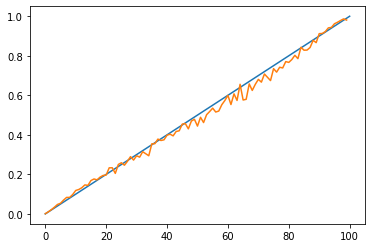

In [37]:
#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)
dd = pd.DataFrame(preds_all.mean(0), columns=all_ich)

k=5
plt.plot([0,100],[0,1])
plt.plot(train_md[[all_ich[k]]].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean().values)

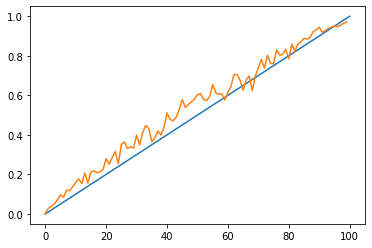

In [47]:
k = 0
dd = pd.DataFrame((preds_all.mean(0)), columns=all_ich)
vals = (train_md[all_ich[k]]*train_md['weights']).groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()/ \
    train_md['weights'].groupby(pd.cut(dd[all_ich[k]],np.arange(101)/100)).mean()

#dd = pd.DataFrame(preds_all.mean(1)[4], columns=all_ich)

plt.plot([0,100],[0,1])
plt.plot(vals.values)

In [48]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k], eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.06205429147394942


In [49]:
res = np.zeros(6)
for k in range(6):
    res[k] = log_loss(train_md[all_ich[k]], preds_all.mean(0)[:,k]**(0.9), eps=1e-7, labels=[0,1], \
                      sample_weight=train_md.weights)
print((res*class_weights).mean())

0.06180536821692572


In [71]:
%run ./Code.ipynb

In [32]:
stats_fn = PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION)
if stats_fn.is_file():
    stats_fn.unlink()

In [33]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=False)
print('total running time', time.time() - stg)

starting fold 0 target 0
obj  0.09322482754798363
obj  0.09320899829390872
obj  0.09320745009777075
obj  0.09320748574979719
obj  0.09320843505157667
obj  0.0932077650687857
obj  0.09317563962744593
obj  0.09319169885135085
obj  0.09325175809801109
obj  0.0931685482411866
obj  0.09308918965952628
obj  0.09308114525892626
obj  0.09308049038797973
obj  0.093080474689122
obj  0.09308047466655035
model [0.2854 0.712 ] sum 0.9974811449672129
v32 f0 t0: original ll 0.0947/0.1039, ensemble ll 0.0947/0.1045
running time 2.611621856689453
starting fold 0 target 1
obj  0.013797619408363222
obj  0.01375773595902145
obj  0.013766636429291304
obj  0.013748745360632107
obj  0.01376002632154903
obj  0.01378748232877202
obj  0.013766850262684054
obj  0.013771691560959833
obj  0.013729815158099514
obj  0.013680790333983554
obj  0.013664941641534062
obj  0.013652021513308495
obj  0.013651934793723123
obj  0.013651879939015212
model [0.1874 0.7926] sum 0.9800038224249039
v32 f0 t1: original ll 0.0150/0.0

obj  0.0406913049009452
obj  0.040637299446070765
obj  0.04061150795879464
obj  0.040605801496458795
obj  0.04060525675917097
obj  0.040605234081430436
obj  0.040605233896318836
model [0.1999 0.7979] sum 0.9978086187056672
v32 f2 t2: original ll 0.0368/0.0377, ensemble ll 0.0367/0.0379
running time 2.390857458114624
starting fold 2 target 3
obj  0.023820429448073634
obj  0.0238199195252424
obj  0.023819889235822907
obj  0.023819977389306607
obj  0.023820287535311676
obj  0.023827926264409445
obj  0.02383511058614639
obj  0.023856440755992966
obj  0.023829956760212705
obj  0.02384286615898133
obj  0.02377576041771608
obj  0.023768635549618465
obj  0.023767439774363245
obj  0.02376733381156744
obj  0.023767329226001895
obj  0.023767329197695964
model [0.2505 0.7482] sum 0.9986999698664766
v32 f2 t3: original ll 0.0234/0.0176, ensemble ll 0.0233/0.0176
running time 2.5426409244537354
starting fold 2 target 4
obj  0.06288147971619633
obj  0.06287753536323375
obj  0.06287698791705973
obj  0

In [34]:
stg = time.time()
for fold in range(3):
    for target in range(6):
        train_ensemble(train_md, preds_all, fold=fold, target=target, weighted=True)
print('total running time', time.time() - stg)

starting fold 0 target 0
obj  0.10638106933209081
obj  0.10598760036331745
obj  0.10577511145581198
obj  0.1057351351604104
obj  0.10572976825946759
obj  0.10571306811961323
obj  0.10569350643531308
obj  0.10543897463211842
obj  0.10546309856176526
obj  0.10508226048539913
obj  0.10482006054083662
obj  0.10475737649640729
obj  0.10473651267765054
obj  0.1047324104789802
obj  0.10473214550335157
model [9.8513e-01 4.9742e-05] sum 0.9851826132184518
v32 f0 t0: original ll 0.0947/0.1039, ensemble ll 0.0962/0.1038
running time 2.481070041656494
starting fold 0 target 1
obj  0.02229291087022159
obj  0.02226082800259585
obj  0.022263359429551613
obj  0.022313829849234666
obj  0.022310239938371387
obj  0.02228949538121694
obj  0.022269865773819095
obj  0.022269428631962164
obj  0.022193690912899258
obj  0.022117525795422716
obj  0.022092349140985384
obj  0.022084388435273487
obj  0.022084361239979013
obj  0.022084334313364953
model [0.1374 0.8626] sum 0.9999982062141717
v32 f0 t1: original ll 

obj  0.021136353027740706
obj  0.02109479832655767
obj  0.02108840257150015
obj  0.021087436429857116
obj  0.021092588249094716
obj  0.021096186737339602
obj  0.021090121523806862
obj  0.021087915188653755
obj  0.021086638643531944
obj  0.0210861944745418
obj  0.021079687628701577
obj  0.021079601857528597
obj  0.02107960148852013
obj  0.021079601488133516
model [0.3855 0.6008] sum 0.9863791121545191
v32 f2 t3: original ll 0.0234/0.0176, ensemble ll 0.0234/0.0176
running time 2.324493646621704
starting fold 2 target 4
obj  0.06115497109879448
obj  0.061152301897258544
obj  0.06115226714928442
obj  0.06115347908808954
obj  0.06116220350671767
obj  0.06115444513514391
obj  0.061158948540844256
obj  0.061161156166101655
obj  0.06115867324774922
obj  0.06115976549987074
obj  0.06115028821785276
obj  0.061150013562364
obj  0.061150005563479964
obj  0.06115000550711764
model [0.4584 0.5376] sum 0.9959934782160942
v32 f2 t4: original ll 0.0622/0.0622, ensemble ll 0.0621/0.0622
running time 2.

In [38]:
stats = pd.read_csv(PATH_DISK/'ensemble'/'stats.v{}'.format(VERSION))
stats.groupby(['weighted','target'])[['valid_loss','valid_loss_ens','valid_w_loss','valid_w_loss_ens']].mean()

valid_loss  valid_loss_ens  valid_w_loss  valid_w_loss_ens
weighted target                                                            
False    0         0.093718        0.093635      0.105561          0.106288
         1         0.014209        0.014068      0.020910          0.020686
         2         0.039438        0.039307      0.039750          0.039942
         3         0.023678        0.023613      0.019965          0.020018
         4         0.062639        0.062471      0.061508          0.061815
         5         0.077264        0.077133      0.080027          0.080418
True     0         0.093718        0.095021      0.105561          0.104567
         1         0.014209        0.014080      0.020910          0.020667
         2         0.039438        0.039535      0.039750          0.039762
         3         0.023678        0.023717      0.019965          0.019936
         4         0.062639        0.062688      0.061508          0.061523
         5         0.077264        0.077523      0.080027          0.080091

In [39]:
tt = pd.concat([
stats.loc[stats.weighted == False].groupby('target')[['valid_loss','valid_w_loss',
                                                      'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean(),
stats.loc[stats.weighted == True].groupby('target')[['valid_loss','valid_w_loss',
                                                     'valid_loss_ens','valid_w_loss_ens']].mean()\
    .apply(lambda x: x*class_weights).mean()
],axis=1)
tt.columns = ['not weighted','weighted']
tt

,not weighted,weighted
valid_loss,0.057809,0.057809
valid_w_loss,0.061898,0.061898
valid_loss_ens,0.057694,0.058226
valid_w_loss_ens,0.062208,0.061588


In [40]:
np.set_printoptions(precision=4)
res2_all = []
for target in range(6):
    res2 = np.zeros((3, 2))
    for fold in range(3):
        model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'
                                 .format(fold,target,VERSION),'rb'))
        res2[fold] = model.x
        #print(fold,target,model.x)
    print(target, res2.mean(0), res2.mean(0).sum())
    res2_all.append(res2)
print('total', np.stack(res2_all).mean((0,1)), np.stack(res2_all).mean((0,1)).sum())

0 [0.9758 0.0133] 0.9890208236733224
1 [0.0755 0.9245] 0.99999750757956
2 [0.5121 0.4765] 0.9885906315242545
3 [0.3465 0.6394] 0.9858337972624043
4 [0.4733 0.5144] 0.987734118671811
5 [0.6697 0.3208] 0.9904312808036815
total [0.5088 0.4815] 0.990268026585839


In [41]:
preds3 = np.stack([pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets3])
preds5 = np.stack([pickle.load(open(PATH_WORK/'preds_d{}_v{}'.format(ds, VERSION),'rb')) for ds in my_datasets5])

In [42]:
preds = np.concatenate([preds3.mean((1,2)), preds5.mean((1,2))],axis=0)

In [43]:
yuval_test = pickle.load(open(PATH_DISK/'ensemble/ensemble_test_image_ids.pkl','rb'))
assert len(yuval_test) == len(test_md)

df = pd.DataFrame(np.arange(len(yuval_test)), columns=['yuval_idx'])
df.index = yuval_test
test_md = test_md.join(df, on = 'img_id')

In [45]:
names_y3 = [
    #'model_Densenet201_3_version_classifier_splits_fullhead_resmodel_type_test_pred_ensamble_split_{}.pkl',
    'model_Densenet161_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_Densenet169_3_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnext101_32x4d_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_classifier_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [46]:
names_y5 = [
    'model_se_resnext101_32x4d_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_fullhead_resmodel_pool2_3_type_test_pred_ensamble_split_{}.pkl',
    'model_se_resnet101_version_new_splits_focal_fullhead_resmodel_pool2_over3_type_test_pred_ensamble_split_{}.pkl',
           ]

In [47]:
preds_y3 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(3)])).numpy() for name in names_y3])

In [48]:
preds_y5 = np.stack([torch.sigmoid(torch.stack([torch.stack(pickle.load(
    open(PATH_DISK/'yuval/OOF'/name.format(fold),'rb'))) for fold in range(5)])).numpy() for name in names_y5])

In [49]:
preds_y = np.concatenate([preds_y3.mean((1,2)), preds_y5.mean((1,2))],axis=0)

In [50]:
preds_y = preds_y[:,test_md.yuval_idx]
preds_y = preds_y[:,:,np.array([5,0,1,2,3,4])]

In [51]:
preds = np.concatenate([preds, preds_y], axis=0)

In [52]:
preds.shape

(12, 78545, 6)

In [53]:
preds = predBounding(preds)

any too low inconsistencies
1 class: 0.0005241156873978823
2 class: 0.01726611072209137
3 class: 0.00852059329047043
4 class: 0.018448023426061493
5 class: 0.04919472913616398
total 0.08796337555965794
any too high inconsistencies
total 0.2386752816856579


In [105]:
#predictions = preds.mean((0,1))

In [54]:
stg = time.time()

test_preds_trgt = []
print('version', VERSION)
for target in range(6):
    
    my_len = len(my_datasets3) + len(my_datasets5)
    X = np.stack([preds[:my_len,:,target].mean(0), 
                  preds[my_len:,:,target].mean(0)], axis=0)
    
    model = pickle.load(open(PATH_DISK/'ensemble'/'model.f{}.t{}.v{}'.format(fold,target,VERSION),'rb'))
    test_preds_trgt.append((X*np.expand_dims(model.x, axis=1)).sum(0))

predictions = np.stack(test_preds_trgt,axis=1)

print('total running time', time.time() - stg)

version 32
total running time 0.027848482131958008


In [55]:
np.corrcoef(preds[:,:,0])

array([[1.    , 0.992 , 0.992 , 0.9932, 0.993 , 0.9955, 0.9927, 0.9892,
        0.9906, 0.9916, 0.9915, 0.9913],
       [0.992 , 1.    , 0.9945, 0.9968, 0.995 , 0.9901, 0.9903, 0.9959,
        0.9924, 0.9949, 0.9931, 0.9932],
       [0.992 , 0.9945, 1.    , 0.9955, 0.9967, 0.9897, 0.9902, 0.9914,
        0.9965, 0.9934, 0.9945, 0.9946],
       [0.9932, 0.9968, 0.9955, 1.    , 0.9967, 0.9906, 0.9915, 0.9932,
        0.9929, 0.9968, 0.9941, 0.9939],
       [0.993 , 0.995 , 0.9967, 0.9967, 1.    , 0.9899, 0.9909, 0.9909,
        0.9936, 0.9936, 0.996 , 0.9954],
       [0.9955, 0.9901, 0.9897, 0.9906, 0.9899, 1.    , 0.995 , 0.9922,
        0.9927, 0.9936, 0.9934, 0.9931],
       [0.9927, 0.9903, 0.9902, 0.9915, 0.9909, 0.995 , 1.    , 0.9915,
        0.9923, 0.9936, 0.9937, 0.9935],
       [0.9892, 0.9959, 0.9914, 0.9932, 0.9909, 0.9922, 0.9915, 1.    ,
        0.9947, 0.9969, 0.9949, 0.9948],
       [0.9906, 0.9924, 0.9965, 0.9929, 0.9936, 0.9927, 0.9923, 0.9947,
        1.    , 0.9959, 

In [110]:
predictions.shape

(78545, 6)

# Submitting

In [68]:
id_column = np.array([a + '_' + b for a in test_md.SOPInstanceUID for b in all_ich])
sub = pd.DataFrame({'ID': id_column, 'Label': predictions.reshape(-1)})
sub.to_csv(PATH/'sub.csv', index=False)

## Sanity checks

In [57]:
test_md['pred_any'] = predictions[:,0]

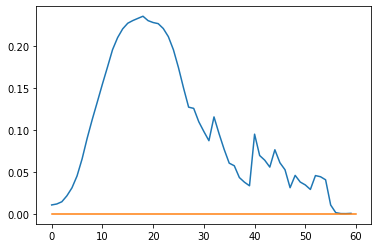

In [58]:
plt.plot(test_md[['pos_idx','pred_any']].groupby('pos_idx').mean())
plt.plot([0,60],[0,0])

In [59]:
# weighted models + weighted ensembling
#0 [2.14e-04 2.50e-04 3.15e-04 2.15e-03 9.88e-01 9.93e-01 9.94e-01]
#1 [4.46e-06 5.32e-06 6.88e-06 8.58e-05 1.34e-01 6.16e-01 9.24e-01]
#2 [4.88e-05 5.54e-05 6.88e-05 3.27e-04 9.65e-01 9.86e-01 9.90e-01]
#3 [1.78e-05 2.00e-05 2.42e-05 1.04e-04 9.52e-01 9.77e-01 9.81e-01]
#4 [6.56e-05 7.67e-05 9.50e-05 4.71e-04 9.41e-01 9.85e-01 9.89e-01]
#5 [9.93e-05 1.21e-04 1.53e-04 9.91e-04 9.42e-01 9.86e-01 9.92e-01]

# weighted models + non-weighted ensembling
#0 [9.25e-05 1.11e-04 1.41e-04 1.60e-03 9.93e-01 9.97e-01 9.99e-01]
#1 [8.16e-06 9.69e-06 1.24e-05 9.28e-05 1.31e-01 5.91e-01 8.94e-01]
#2 [2.38e-05 2.66e-05 3.46e-05 2.46e-04 9.73e-01 9.91e-01 9.94e-01]
#3 [1.25e-05 1.40e-05 1.71e-05 8.06e-05 9.66e-01 9.90e-01 9.94e-01]
#4 [3.27e-05 3.80e-05 4.71e-05 3.55e-04 9.51e-01 9.91e-01 9.94e-01]
#5 [4.51e-05 5.74e-05 7.40e-05 7.90e-04 9.46e-01 9.89e-01 9.94e-01]

np.set_printoptions(precision=2)
for k in range(6):
    print(k,np.quantile(predictions[:,k],[0.0001,0.001,0.01,0.5,0.99,0.999,0.9999]))

0 [2.10e-04 2.44e-04 3.07e-04 2.12e-03 9.88e-01 9.93e-01 9.94e-01]
1 [1.75e-06 2.25e-06 2.97e-06 8.17e-05 1.37e-01 6.15e-01 9.29e-01]
2 [4.72e-05 5.32e-05 6.65e-05 3.21e-04 9.65e-01 9.85e-01 9.89e-01]
3 [1.72e-05 1.93e-05 2.34e-05 1.01e-04 9.52e-01 9.77e-01 9.81e-01]
4 [6.27e-05 7.33e-05 9.11e-05 4.57e-04 9.41e-01 9.85e-01 9.89e-01]
5 [8.91e-05 1.11e-04 1.39e-04 9.58e-04 9.42e-01 9.86e-01 9.93e-01]


In [60]:
# weighted models + weighted ensembling
#array([0.1361, 0.0056, 0.0429, 0.0295, 0.0468, 0.0569])

# weighted models + non-weighted ensembling
#array([0.1335, 0.0055, 0.0423, 0.0298, 0.0466, 0.0556])

np.set_printoptions(precision=4)
predictions.mean(0)

array([0.136 , 0.0056, 0.0429, 0.0295, 0.0468, 0.0567])

In [61]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1359634515380794

In [93]:
sub.loc[range(0,len(sub),6), 'Label'].mean()

0.13418304425483424

In [62]:
sub = sub.sort_values('ID').reset_index(drop=True)
best_sub = pd.read_csv(PATH/'submission56.csv').sort_values('ID').reset_index(drop=True)

In [63]:
best_sub.loc[range(0,len(sub),6), 'Label'].mean()

0.1332598999809263

In [64]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.9863437690031238, pvalue=0.0)

In [124]:
sp.stats.spearmanr(sub.loc[range(0,len(sub),6), 'Label'], 
                   best_sub.loc[range(0,len(sub),6), 'Label'])

SpearmanrResult(correlation=0.985530472858697, pvalue=0.0)

In [65]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9987311527497782

In [126]:
np.corrcoef(sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'], 
            best_sub.sort_values('ID').reset_index(drop=True).loc[range(0,len(sub),6), 'Label'])[0,1]

0.9986350935991319

## Submission

In [5]:
!~/.local/bin/kaggle competitions submit rsna-intracranial-hemorrhage-detection -f ~/sub.csv -m "GCP, my weighted + yuval + focal, 32TTA, ensembling weighted"

100%|██████████████████████████████████████| 20.8M/20.8M [00:02<00:00, 7.60MB/s]
Successfully submitted to RSNA Intracranial Hemorrhage Detection

In [ ]:
!kaggle competitions submit rsna-intracranial-hemorrhage-detection -f C:/StudioProjects/Hemorrhage/sub.csv -m "GCP, d161+d169+d201+s101+yd161, 8TTA, ensemble, bounds"